<a href="https://colab.research.google.com/github/AngelRosalesContreras/Practica_3_2/blob/main/Practica_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

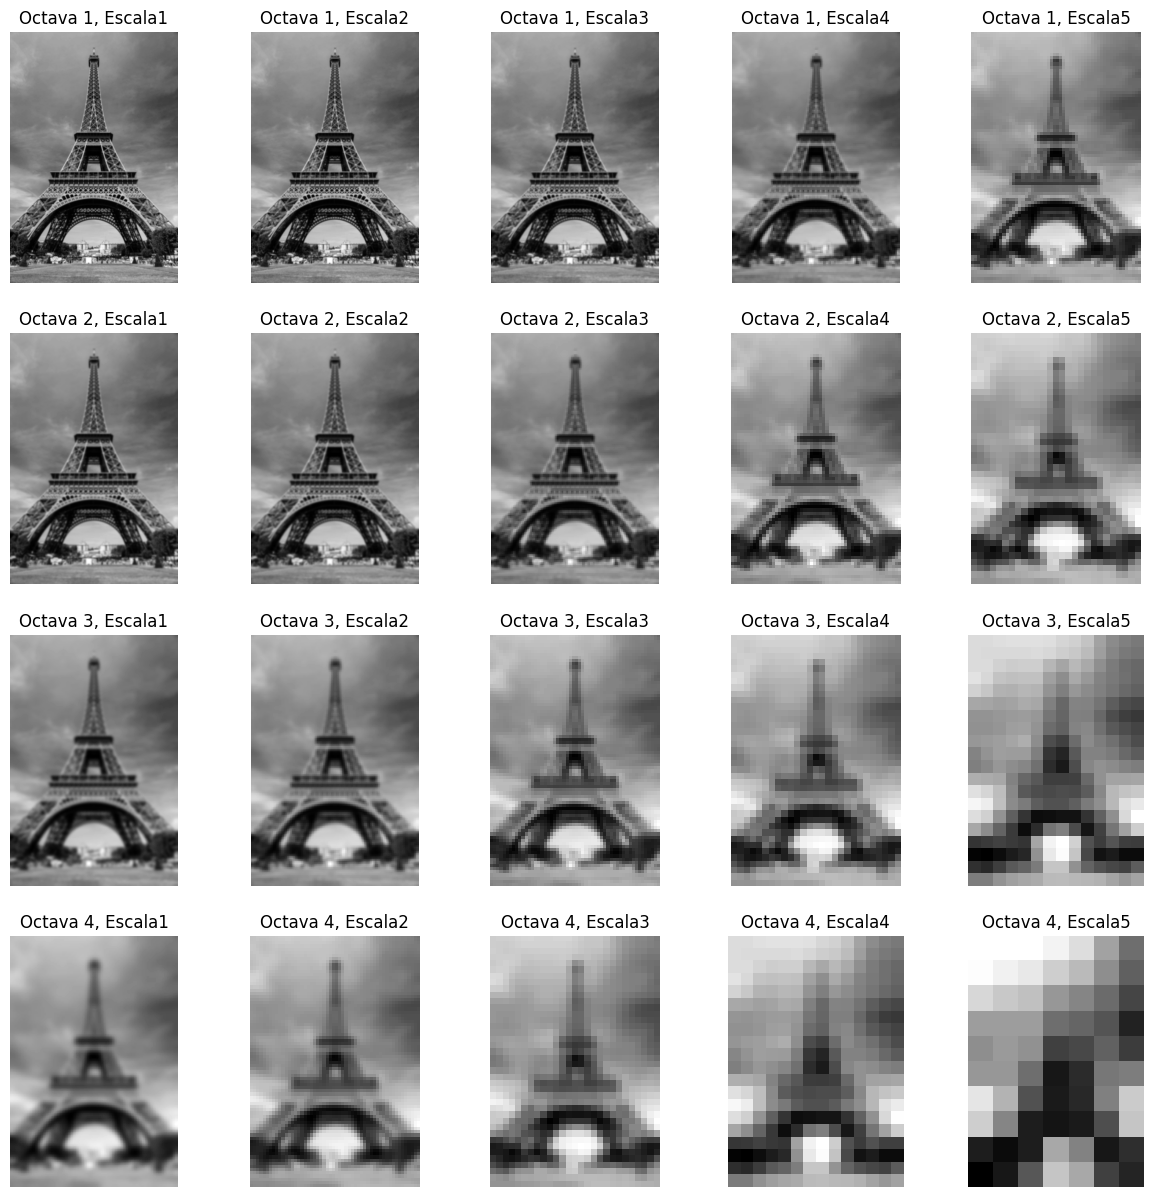

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def build_scale_space(image, num_octaves=4, num_scales=5, sigma=1.6):
    # Construir una pirámide de imágenes en diferentes escalas
    scale_space = []

    for octave in range(num_octaves):
        octave_images = []
        base = cv2.GaussianBlur(image, (0, 0), sigmaX=sigma)

        for scale in range(num_scales):
            octave_images.append(base)
            base = cv2.pyrDown(base)  # Submuestrear la imagen para la siguiente escala

        scale_space.append(octave_images)
        image = cv2.pyrDown(image)  # Submuestrear la imagen para la siguiente octava

    return scale_space

def visualize_scale_space(scale_space):
    fig, axs = plt.subplots(len(scale_space), len(scale_space[0]), figsize=(15, 15))

    for octave, images in enumerate(scale_space):
        for scale, image in enumerate(images):
            axs[octave, scale].imshow(image, cmap='gray')
            axs[octave, scale].set_title(f'Octava {octave + 1}, Escala{scale + 1}')
            axs[octave, scale].axis('off')

    plt.show()


# Cargar una imagen de ejemplo
image_path = 'uno.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Construir el espacio de escalas con parámetros personalizables
scale_space = build_scale_space(image, num_octaves=4, num_scales=5, sigma=1.6)

# Visualizar el espacio de escalas
visualize_scale_space(scale_space)
